In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)
classifier  = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])


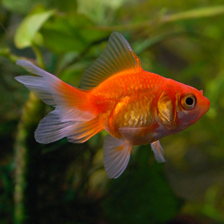

In [ ]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 953ms/step


(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
image_labels = []
with open('ImageNetLabels.txt', 'r') as f:
  image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True )


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('datasets/flower_photos/roses/13342823005_16d3df58df_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5212885371_fe27c406a2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5181899042_0a6ffe0c8a_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('datasets/flower_photos/roses/13342823005_16d3df58df_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5212885371_fe27c406a2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5181899042_0a6ffe0c8a_n.jpg')]

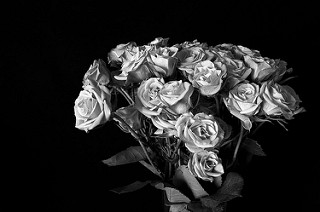

In [ ]:
Image.open(str(roses[1]))

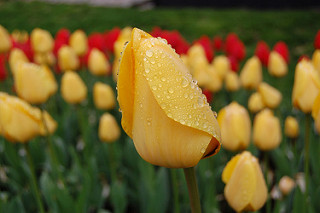

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [ ]:
flowers_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_label_dict = {
     'roses' : 0,
     'daisy' : 1,
     'dandelion' : 2,
     'sunflowers' : 3,
     'tulips' : 4,
}

In [ ]:
flowers_image_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('datasets/flower_photos/roses/13342823005_16d3df58df_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5212885371_fe27c406a2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5181899042_0a6ffe0c8a_n.jpg')]

In [ ]:
str(flowers_image_dict['roses'][0])


'datasets/flower_photos/roses/4754734410_94d98463a5.jpg'

In [ ]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img, (224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(flowers_label_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

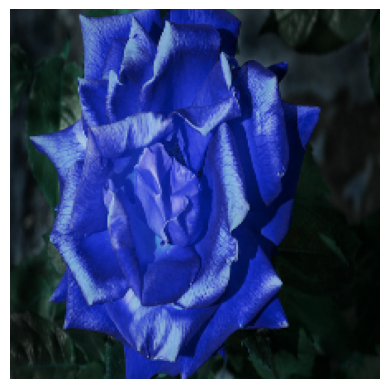

In [ ]:
plt.axis('off')
plt.imshow(X[0])

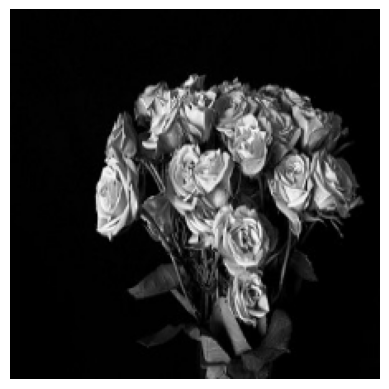

In [ ]:
plt.axis('off')
plt.imshow(X[1])

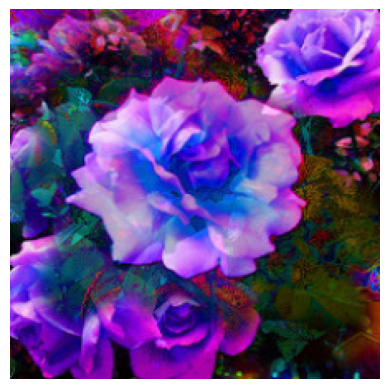

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([795, 550, 795])

In [ ]:
image_labels[795]

'shower curtain'

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator()
batch_size = 32
train_generator = datagen.flow(
    X_train_scaled,
    y_train,
    batch_size=batch_size,
    shuffle=True,   # Shuffle the order of the images
    seed=123
)

In [ ]:
'''datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,   # Rescale pixel values to [0, 1]
    rotation_range=20,   # Random rotation in the range [-20, 20] degrees
    width_shift_range=0.2,   # Random horizontal shift by up to 20% of the image width
    height_shift_range=0.2,   # Random vertical shift by up to 20% of the image height
    shear_range=0.2,   # Shear intensity (shear angle in counter-clockwise direction)
    zoom_range=0.2,   # Random zoom in the range [0.8, 1.2]
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'   # Strategy for filling in newly created pixels
)

# Directory containing the images
data_dir = "/path/to/dataset"

# Batch size for loading images
batch_size = 32

# Create a generator for loading images from directory
train_generator = datagen.flow_from_directory(
    data_dir,   # Directory containing the images
    target_size=(224, 224),   # Dimensions to which all images will be resized
    batch_size=batch_size,   # Batch size for loading images
    class_mode='sparse',   # Type of label arrays returned by the generator
    shuffle=True,   # Shuffle the order of the images
    seed=123,   # Seed for random number generator
    interpolation='nearest'   # Interpolation method used for resizing images
)'''

In [ ]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc'])

model.fit(train_generator, epochs=5)

Epoch 1/5
86/86 [==============================] - 112s 1s/step - loss: 0.8195 - acc: 0.6868
Epoch 2/5
86/86 [==============================] - 106s 1s/step - loss: 0.4200 - acc: 0.8517
Epoch 3/5
86/86 [==============================] - 109s 1s/step - loss: 0.3381 - acc: 0.8837
Epoch 4/5
86/86 [==============================] - 109s 1s/step - loss: 0.2816 - acc: 0.9102
Epoch 5/5
86/86 [==============================] - 107s 1s/step - loss: 0.2415 - acc: 0.9259


In [ ]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 48s 2s/step - loss: 0.3606 - acc: 0.8725


[0.3606426417827606, 0.8725489974021912]